# Spike Encoder Testing

This notebook is used to visualize the spike encoder and decoder. The encoder takes in a sequence of numbers and encodes them into spikes, while the decoder takes the spikes and decodes them back into the original sequence.


## Enable auto-reload

Enables automatic reloading of modules when they are modified. This is useful for development and testing purposes.


In [1]:
%reload_ext autoreload
%autoreload all

%aimport -torch
%aimport -matplotlib
%aimport -seaborn
%aimport -numpy
%aimport -pandas
%aimport -scipy
%aimport -lightning 

In [3]:
from torch.utils.data import DataLoader

from eeg_snn_encoder.dataset import CHBMITDataset
from eeg_snn_encoder.config import PROCESSED_DATA_DIR

# Load the dataset
dataset = CHBMITDataset(PROCESSED_DATA_DIR / "stft_normalized.h5")

data_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

## Get the test data


In [4]:
test_data, test_label = next(iter(data_loader))

In [5]:
display_dim = (0, 0, 0)

## Poisson Encoder


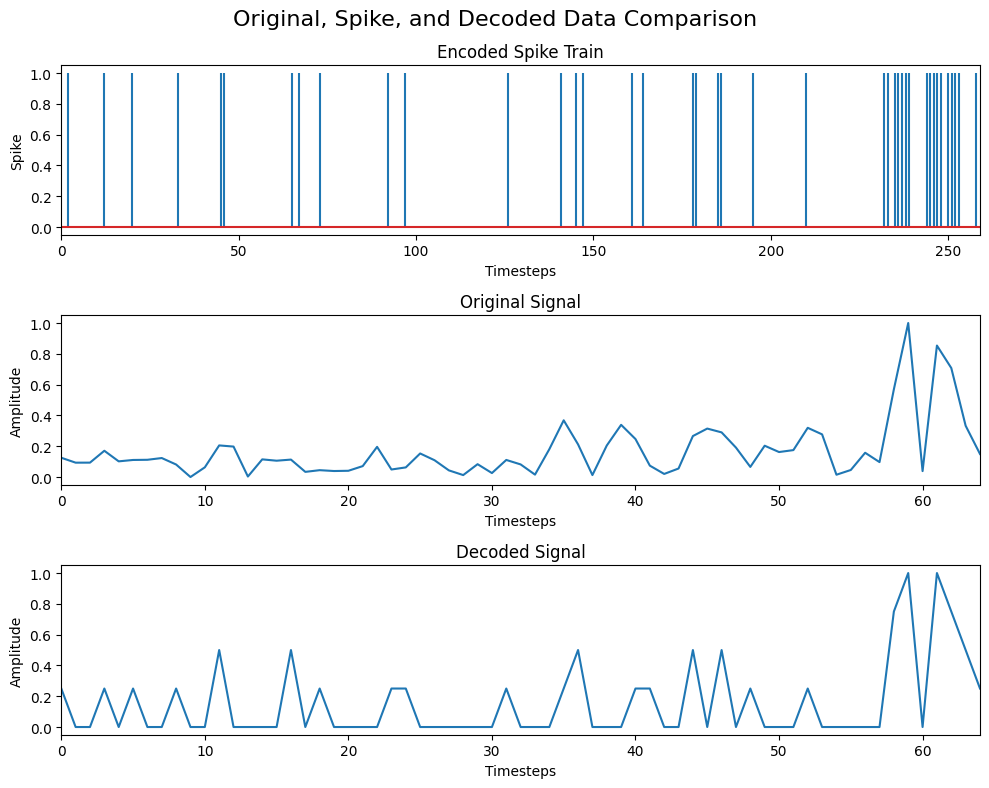

In [6]:
from eeg_snn_encoder.plots import plot_recon_compare
from eeg_snn_encoder.encoders import PoissonEncoderExpand

expand_poisson_encoder = PoissonEncoderExpand(interval_freq=4, random_seed=24)
encoded_data = expand_poisson_encoder.encode(test_data)
decoded_rate = expand_poisson_encoder.decode(encoded_data)

plot_recon_compare(test_data[display_dim], encoded_data[display_dim], decoded_rate[display_dim])

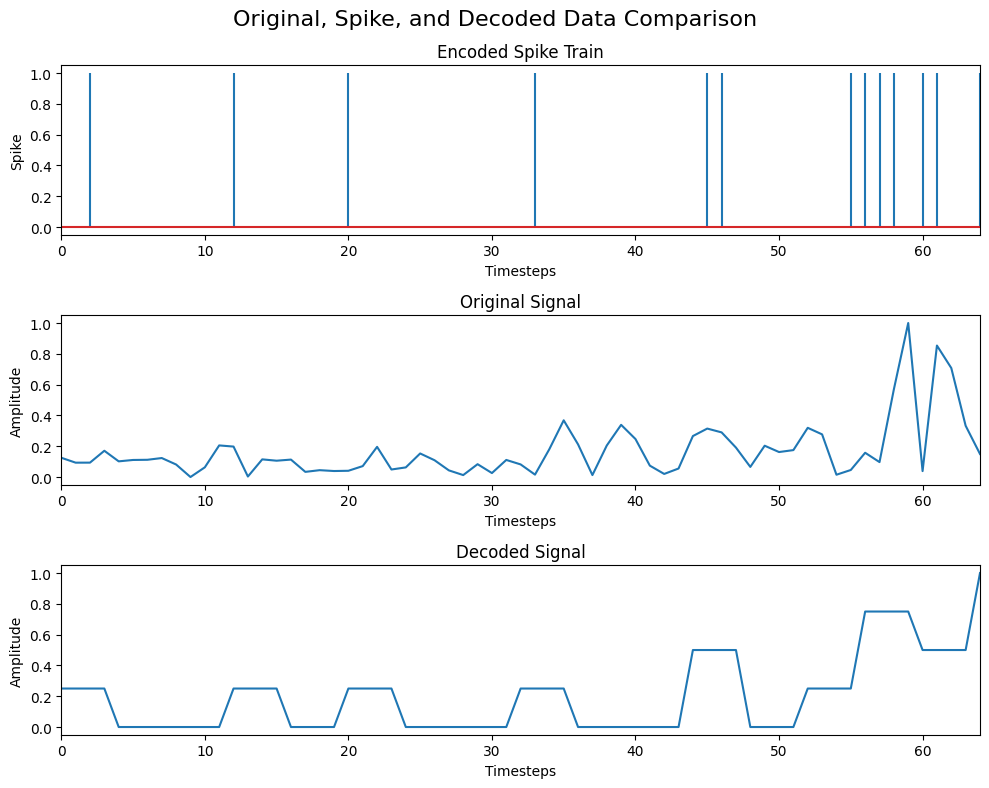

In [7]:
from eeg_snn_encoder.encoders import PoissonEncoder

poisson_encoder = PoissonEncoder(interval_freq=4, random_seed=24)
encoded_data = poisson_encoder.encode(test_data)
decoded_rate = poisson_encoder.decode(encoded_data)

plot_recon_compare(test_data[display_dim], encoded_data[display_dim], decoded_rate[display_dim])

## Step-Forward Encoder

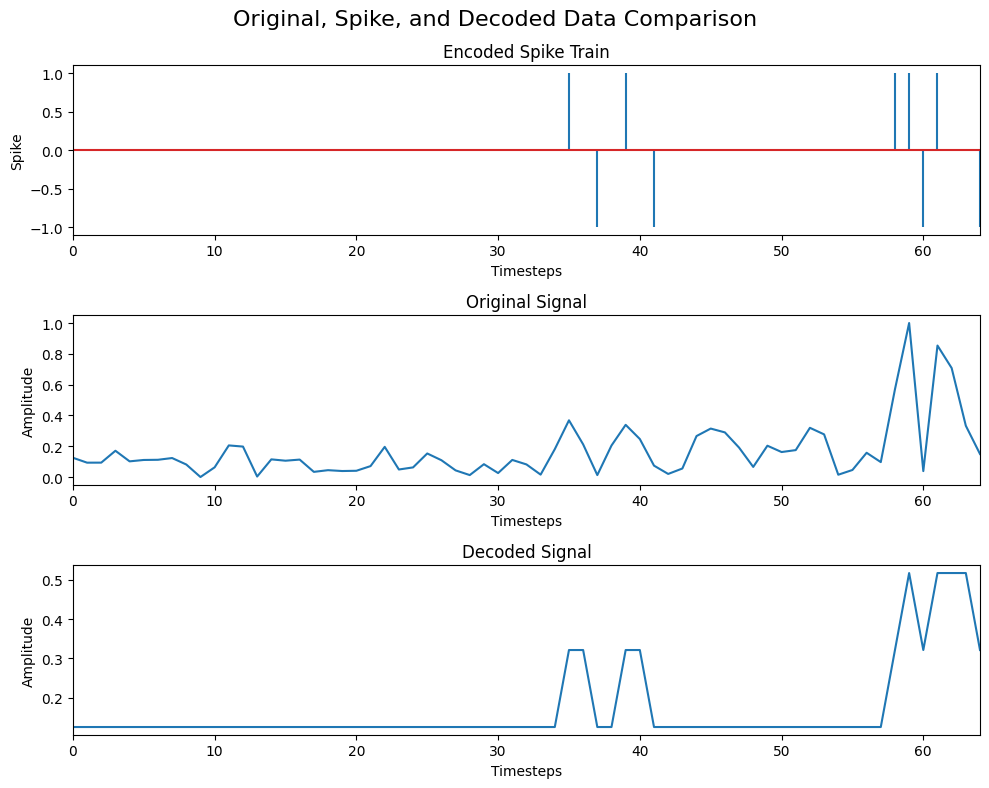

In [8]:
from eeg_snn_encoder.encoders import StepForwardEncoder

sf_encoder = StepForwardEncoder(threshold=0.19606764001960716)
decoder_base = test_data.select(-1, 0).unsqueeze(-1)
encoded_data = sf_encoder.encode(test_data)
decoded_rate = sf_encoder.decode(encoded_data, base=decoder_base)

plot_recon_compare(test_data[display_dim], encoded_data[display_dim], decoded_rate[display_dim])

# Threshold-based Representation Encoder

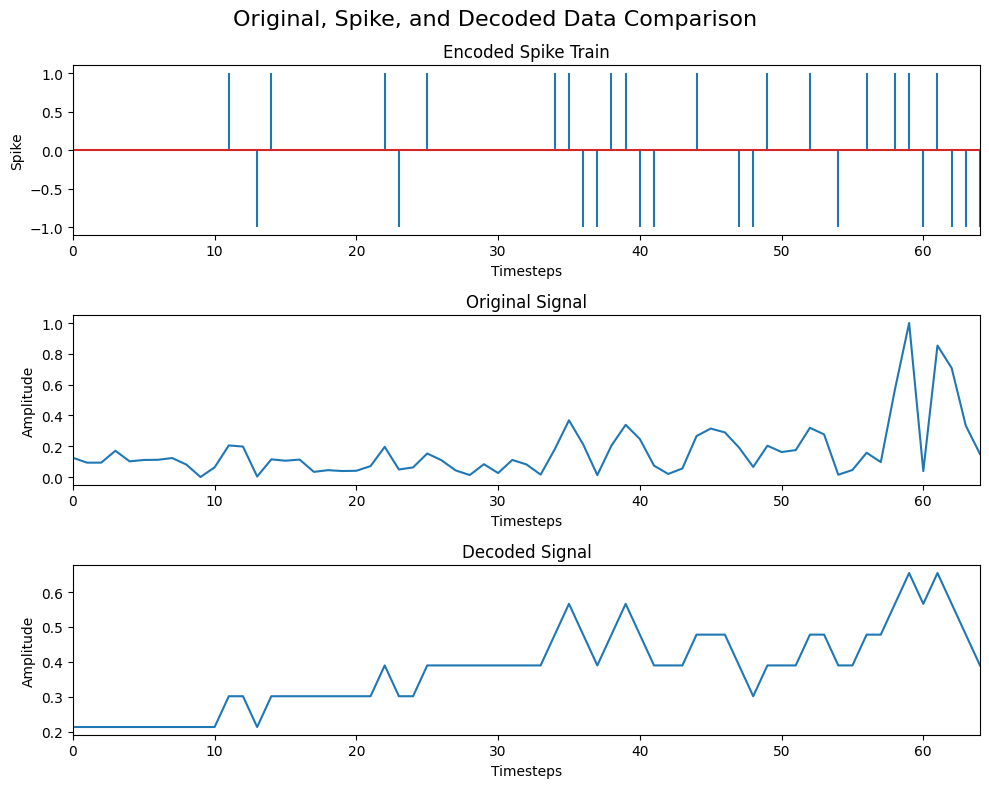

In [9]:
from eeg_snn_encoder.encoders import TBREncoder

tbr_encoder = TBREncoder(threshold=0.40992623011415186)
decoder_base, decoder_threshold = tbr_encoder.get_decode_parameters(test_data)
encoded_data = tbr_encoder.encode(test_data)
decoded_rate = tbr_encoder.decode(encoded_data, base=decoder_base, threshold=decoder_threshold)

plot_recon_compare(test_data[display_dim], encoded_data[display_dim], decoded_rate[display_dim])

## Ben's Spiking Algorithm Encoder

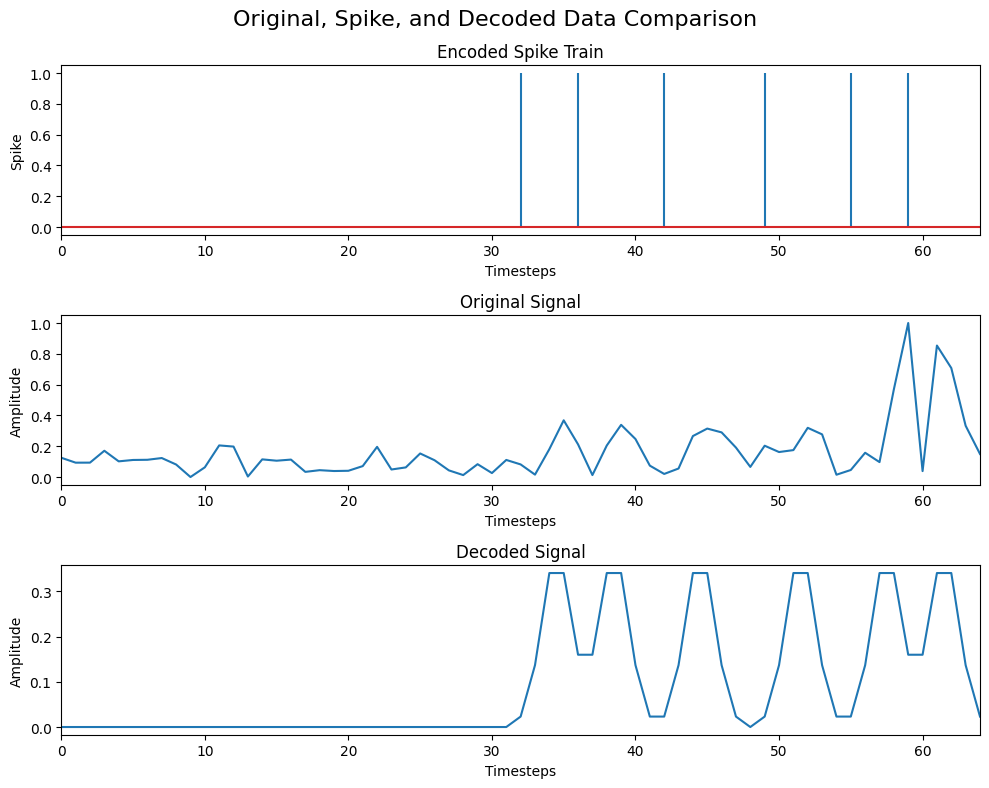

In [10]:
from eeg_snn_encoder.encoders import BSAEncoder

bsa_encoder = BSAEncoder(win_size=6, cutoff=0.15678260630598448, threshold=0.4054443922810268)
encoded_data = bsa_encoder.encode(test_data)
decoded_rate = bsa_encoder.decode(encoded_data)

plot_recon_compare(test_data[display_dim], encoded_data[display_dim], decoded_rate[display_dim])

## Phase Encoder

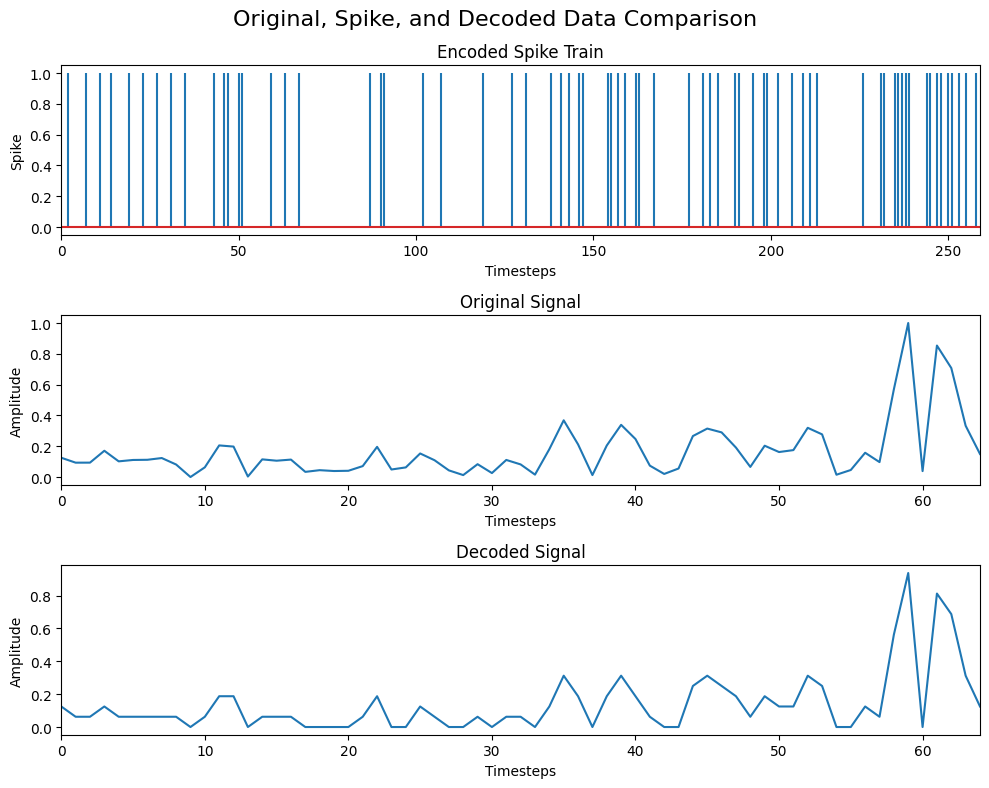

In [11]:
from eeg_snn_encoder.encoders import PhaseEncoderExpand

expand_phase_encoder = PhaseEncoderExpand(phase_window=4)
encoded_data = expand_phase_encoder.encode(test_data)
decoded_rate = expand_phase_encoder.decode(encoded_data)

plot_recon_compare(test_data[display_dim], encoded_data[display_dim], decoded_rate[display_dim])

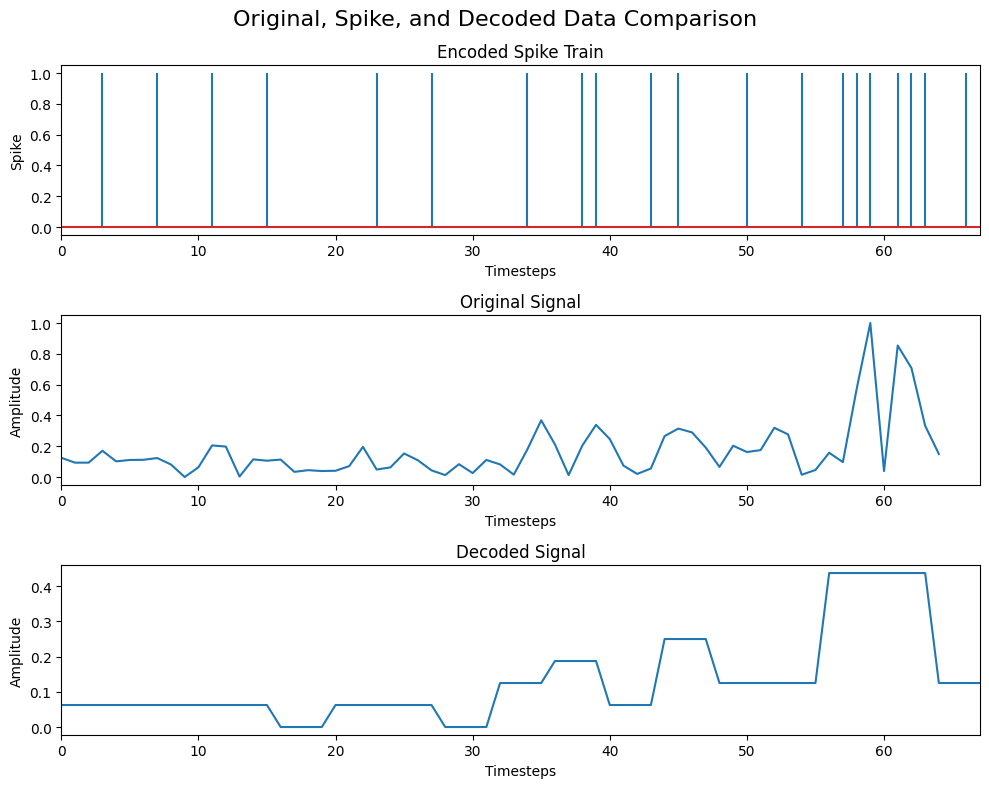

In [12]:
from eeg_snn_encoder.encoders import PhaseEncoder

phase_encoder = PhaseEncoder(phase_window=4)
encoded_data = phase_encoder.encode(test_data)
decoded_rate = phase_encoder.decode(encoded_data)

plot_recon_compare(test_data[display_dim], encoded_data[display_dim], decoded_rate[display_dim])

## Burst Encoder

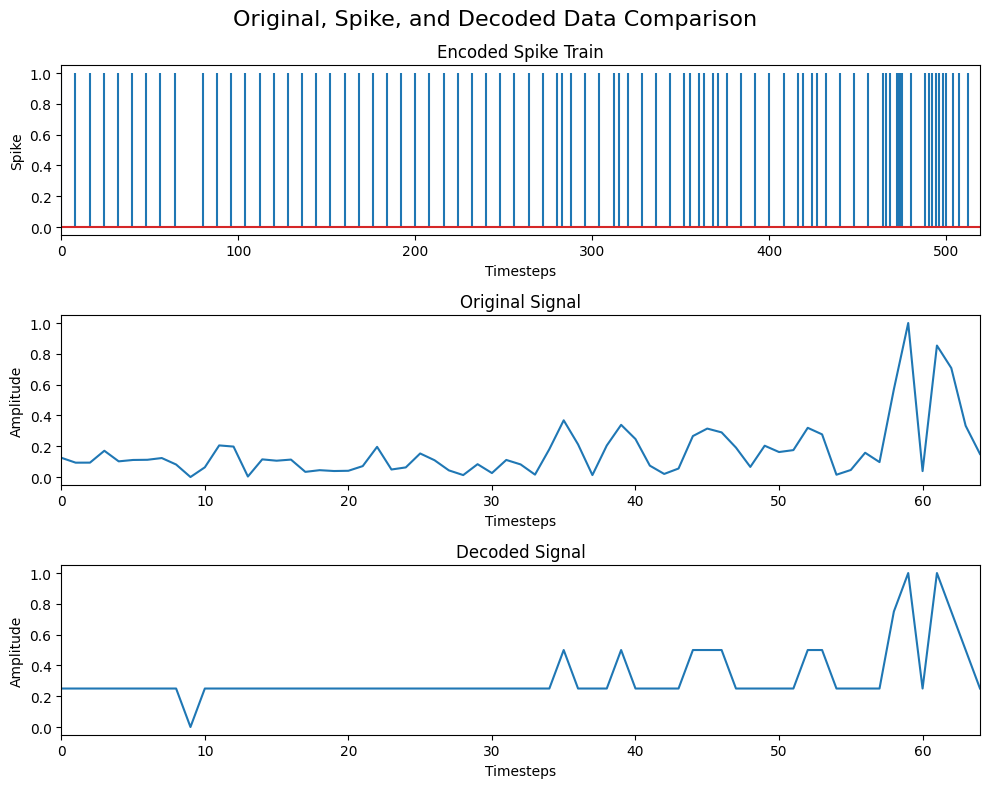

In [13]:
from eeg_snn_encoder.encoders import BurstEncoderExpand

expand_burst_encoder = BurstEncoderExpand(max_window=8, n_max=4, t_max=2, t_min=0)
encoded_data = expand_burst_encoder.encode(test_data)
decoded_rate = expand_burst_encoder.decode(encoded_data)

plot_recon_compare(test_data[display_dim], encoded_data[display_dim], decoded_rate[display_dim])

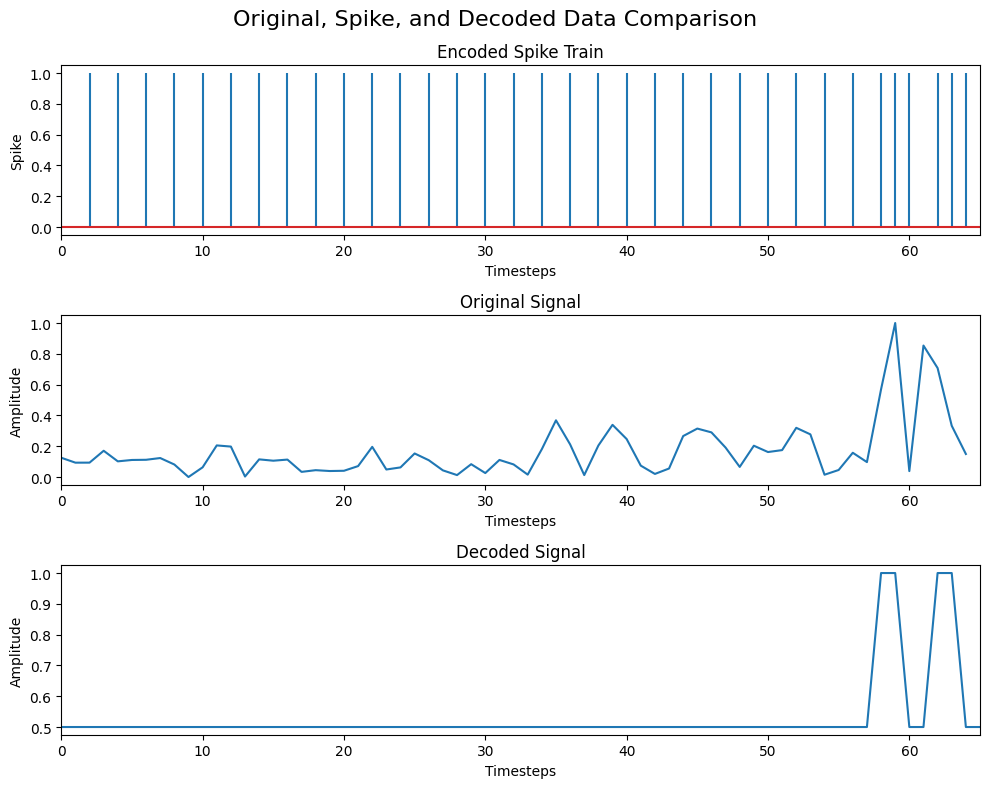

In [16]:
from eeg_snn_encoder.encoders import BurstEncoder

burst_encoder = BurstEncoder(max_window=2, n_max=2, t_max=0, t_min=0)
encoded_data = burst_encoder.encode(test_data)
decoded_rate = burst_encoder.decode(encoded_data)

plot_recon_compare(test_data[display_dim], encoded_data[display_dim], decoded_rate[display_dim])